In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
file = "CrossingSmaIndicator/1641168000000-1644364800000-4h-history.csv"
df = pd.read_csv("../data/trading_history/" + file, low_memory=False)

In [9]:
df.shape

(3906, 18)

In [10]:
# Removing useless columns
df.drop(['EntryTime',
         'ExitTime',
         'EntryPrice',
         'ExitPrice',
         'Position',
         'Portfolio',
         'Open',
         'High',
         'Low', 
         'SMA9',
         'SMA21',
        ], inplace=True, axis=1)

In [11]:
df.Variation = df.Variation.apply(lambda x: 1 if x>0 else 0)
X = df.drop(columns=["Variation"], axis=1)
y = df.Variation
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

(array([2512.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1394.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

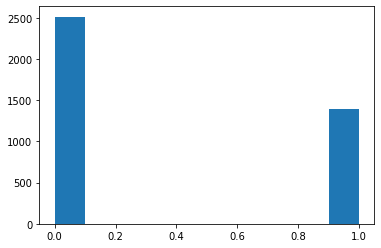

In [12]:
plt.hist(y)

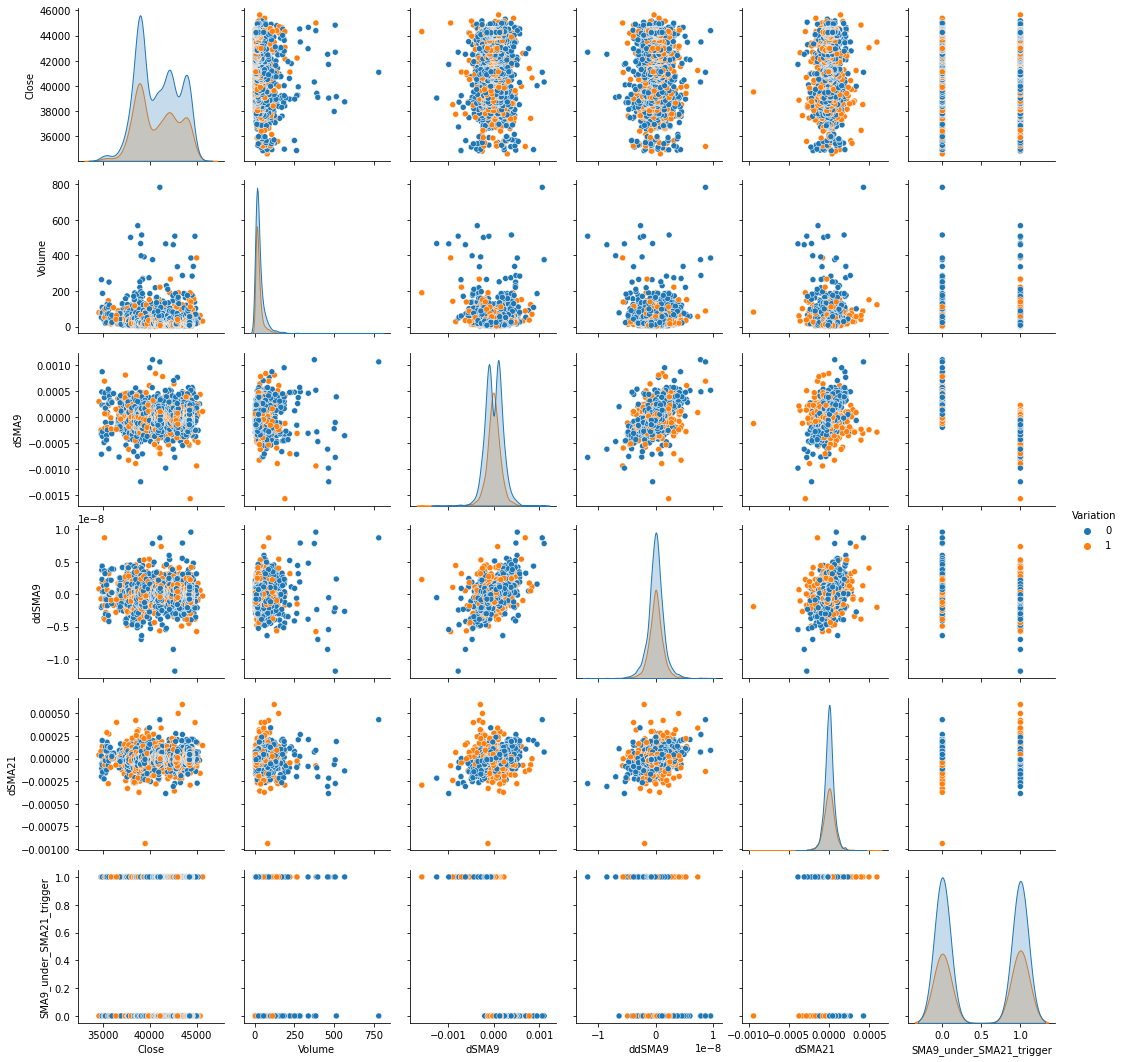

In [13]:
sns.pairplot(df, hue="Variation")

# PCA


In [14]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
  
# fitting
scalar.fit(X)
scaled_data = scalar.transform(X)

# Importing PCA
from sklearn.decomposition import PCA
  
# Let's say, components = 2
pca = PCA(n_components='mle', svd_solver='full')
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

x_pca.shape

(3906, 5)

# Comparaison

In [15]:
def run_comparaison(X, y):
    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))

    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

        # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

LR: 0.643117 (0.025416)
LDA: 0.643117 (0.025416)
KNN: 0.562736 (0.018124)
CART: 0.627494 (0.029341)
NB: 0.621351 (0.024043)
SVM: 0.643117 (0.025416)


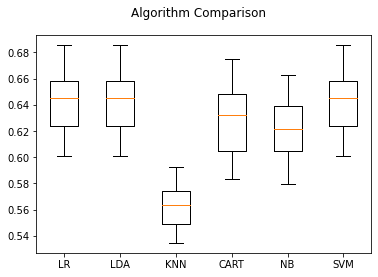

In [16]:
run_comparaison(X, y)

LR: 0.643117 (0.025416)
LDA: 0.643117 (0.025416)
KNN: 0.677681 (0.027122)
CART: 0.616244 (0.028953)
NB: 0.690742 (0.027347)
SVM: 0.711987 (0.022522)


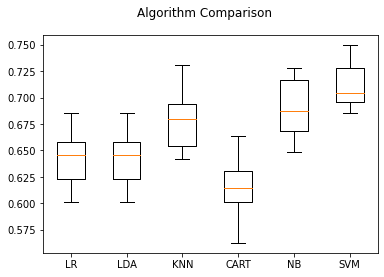

In [17]:
run_comparaison(x_pca, y)

# LDA 

In [18]:
clf = LDA()
clf.fit(X_train, y_train)
y_pred_lda = clf.predict(X_test)

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_lda)
sns.heatmap(cf_matrix, annot=True)

# SVM 

In [19]:
clf = svm.SVC()
clf.fit(X_test, y)
y_pred_sdm = clf.predict(X_test)

NameError: name 'svm' is not defined

# Auto sklearn 

In [ ]:
import autosklearn.classification
import sklearn.metrics

# cls = autosklearn.classification.AutoSklearnClassifier()
# cls.fit(X_train, y_train)
# predictions = cls.predict(X_test)
# print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

In [ ]:
# predictions